In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy.stats as st
import pandas

In [3]:
xy = pandas.read_csv("2014_us_cities.csv")

In [10]:
xy

name      pop        lat         lon
0             New York   8287238  40.730599  -73.986581
1          Los Angeles   3826423  34.053717 -118.242727
2              Chicago   2705627  41.875555  -87.624421
3              Houston   2129784  29.758938  -95.367697
4         Philadelphia   1539313  39.952335  -75.163789
...                 ...      ...        ...         ...
3223      Spanish Fort      7102  30.674913  -87.915272
3224        Plaquemine      7102  30.289083  -91.234274
3225  Milton-Freewater      7102  45.932635 -118.387743
3226            Benton      7096  36.034529  -88.101285
3227        Ocean City      7094  39.277616  -74.574600

[3228 rows x 4 columns]

In [4]:
x = xy["lon"].to_numpy()
y = xy["lat"].to_numpy()

In [11]:
pop = xy["pop"].to_numpy()

In [5]:
w = abs(max(x)-min(x))
h = abs(max(y)-min(y))
col = complex(int(w/0.1))
row = complex(int(h/0.1))

#### 这个是extent

In [6]:
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

#### 这个是点的坐标集

In [7]:
values = np.vstack([x, y])

In [8]:
bw = 0.1
bw_method=bw/np.asarray(values).std(ddof=1)

In [14]:
X, Y = np.mgrid[xmin:xmax:row, ymin:ymax:col]
positions = np.vstack([X.ravel(), Y.ravel()])

kernel = st.gaussian_kde(values,bw_method=bw)
kernel_w = st.gaussian_kde(values,bw_method=bw,weights=pop)
Z = np.reshape(kernel(positions).T, X.shape)
Z_w = np.reshape(kernel_w(positions).T, X.shape)

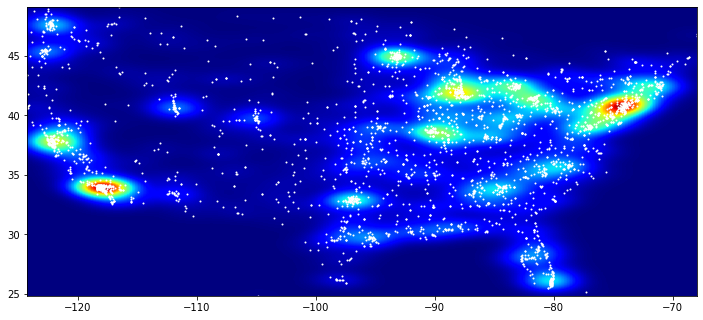

In [15]:
fig, ax = plt.subplots(figsize=(12,7))
ax.imshow(np.rot90(Z), cmap=plt.cm.jet,
           extent=[xmin, xmax, ymin, ymax])
ax.plot(x, y, 'w.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

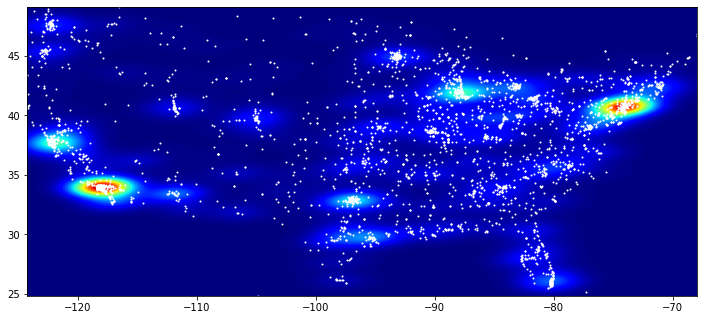

In [16]:
fig, ax = plt.subplots(figsize=(12,7))
ax.imshow(np.rot90(Z_w), cmap=plt.cm.jet,
           extent=[xmin, xmax, ymin, ymax])
ax.plot(x, y, 'w.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [ ]:
import rasterio
dataset = rasterio.open(
	"",
	'w',
	driver='GTiff',# 图像类型
	height=np.rot90(Z).shape[0],
	width=np.rot90(Z).shape[1],
	count=1,# 总层数
	dtype=np.float64,# 数据类型
	crs=rasterio.crs.CRS({'init': 'epsg:4326'})) 
dataset.write(np.rot90(Z),1)
dataset.close()

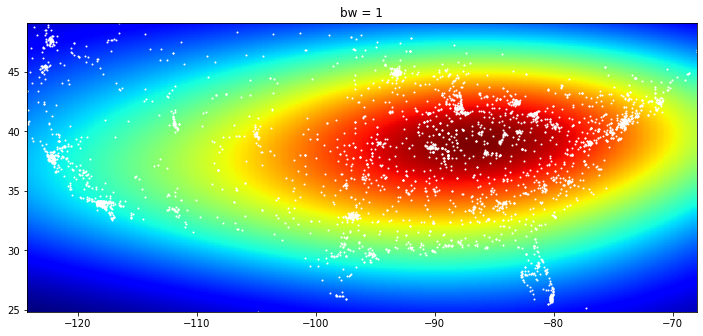

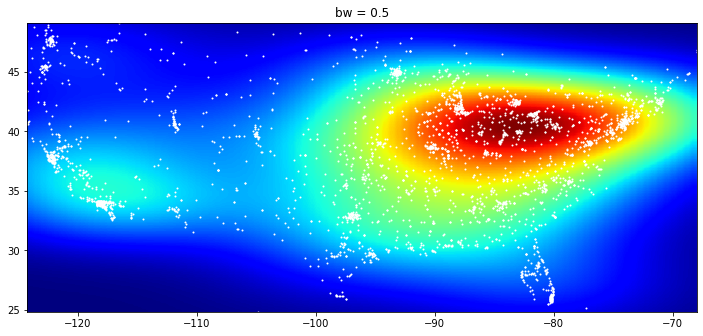

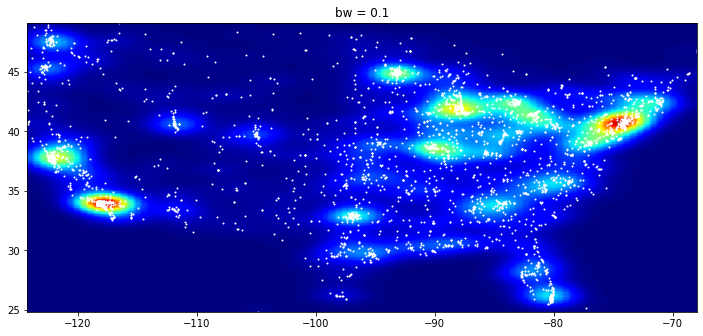

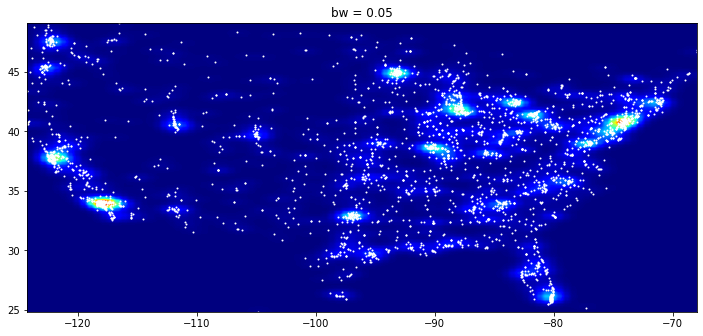

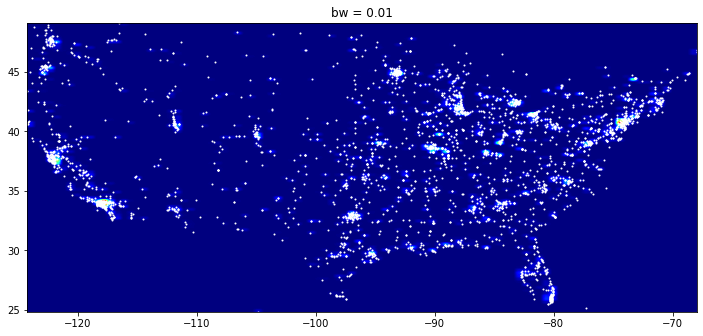

In [47]:
for i in (1,0.5,0.1,0.05,0.01):
    bw = i
    bw_method=bw/np.asarray(values).std(ddof=1)
    kernel = st.gaussian_kde(values,bw_method=bw)
    Z = np.reshape(kernel(positions).T, X.shape)
    fig, ax = plt.subplots(figsize=(12,7))
    ax.imshow(np.rot90(Z), cmap=plt.cm.jet,
           extent=[xmin, xmax, ymin, ymax])
    ax.plot(x, y, 'w.', markersize=2)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    plt.title(f"bw = {i}")
    plt.show()